<a href="https://colab.research.google.com/github/bryantanwz/toy-projects/blob/main/autoencoder_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Autoencoder in Keras
# MNIST dataset of Handwritten Numbers, 784 (28x28) features will be reduced to 10 at the bottleneck of the AE

In [4]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, _) , (x_test, _) = mnist.load_data()
# Pixel values from 1-255, feature scale it to 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train.shape # Check shape
x_test.shape # Check shape

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # Reshaped from 28x28 image to 784 dimensions
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) # Reshaped from 28x28 image to 784 dimensions

In [16]:
x_train.shape # Check shape, 784 dimensions
x_test.shape

(60000, 784)

In [21]:
# Encoder
encoding_dim = 10 # Tiny!
input_img = Input(shape = (np.prod(x_train.shape[1:]),))

encoded = Dense(128, activation = 'relu')(input_img)
encoded = Dense(64, activation = 'relu')(encoded)
encoded = Dense(32, activation = 'relu')(encoded)
encoded_output = Dense(encoding_dim, activation = 'relu')(encoded)

# Decoder
decoded = Dense(32, activation = 'relu')(encoded_output)
decoded = Dense(64, activation = 'relu')(decoded)
decoded = Dense(128, activation = 'relu')(decoded)
decoded_output = Dense(784, activation = 'sigmoid')(decoded) # Original Image Size

# Autoencoder model
autoencoder = Model(input_img, decoded_output)

In [30]:
# Compile Autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

In [31]:
# Train Autoencoder
autoencoder.fit(x_train, x_train, epochs=40, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
# To tune model, adjust number or type of layers, learning rate, etc.

Epoch 1/40
235/235 [==============================] - 7s 25ms/step - loss: 0.1135 - val_loss: 0.1149
Epoch 2/40
235/235 [==============================] - 4s 17ms/step - loss: 0.1132 - val_loss: 0.1151
Epoch 3/40
235/235 [==============================] - 4s 17ms/step - loss: 0.1130 - val_loss: 0.1148
Epoch 4/40
235/235 [==============================] - 6s 23ms/step - loss: 0.1130 - val_loss: 0.1149
Epoch 5/40
235/235 [==============================] - 4s 17ms/step - loss: 0.1129 - val_loss: 0.1149
Epoch 6/40
235/235 [==============================] - 4s 17ms/step - loss: 0.1129 - val_loss: 0.1148
Epoch 7/40
235/235 [==============================] - 6s 24ms/step - loss: 0.1129 - val_loss: 0.1147
Epoch 8/40
235/235 [==============================] - 4s 17ms/step - loss: 0.1129 - val_loss: 0.1150
Epoch 9/40
235/235 [==============================] - 8s 33ms/step - loss: 0.1129 - val_loss: 0.1149
Epoch 10/40
235/235 [==============================] - 9s 37ms/step - loss: 0.1128 - val_lo

In [29]:
#Encode and Decode
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


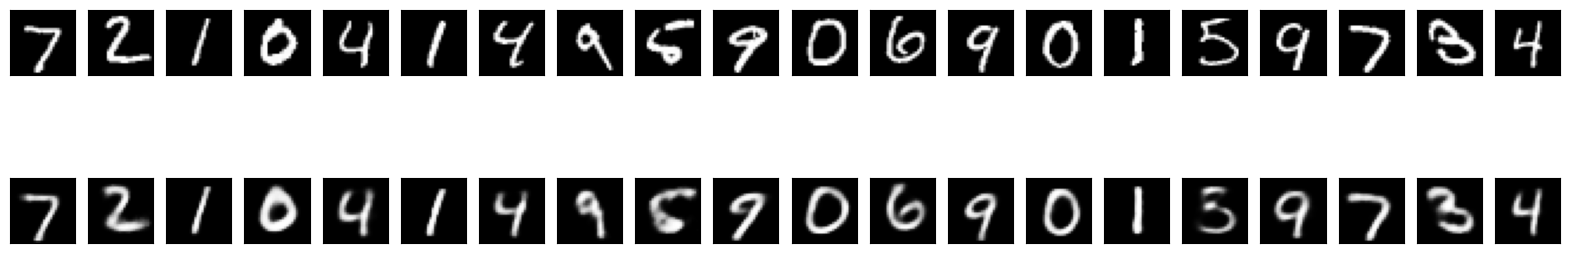

In [33]:
# Visualise Test
import matplotlib.pyplot as plt

n = 20 # Number of digits to display
plt.figure(figsize=(20,4))

for i in range(n):
  # Display before
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display after
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()